## 2. Programming section

#### Question 2.1

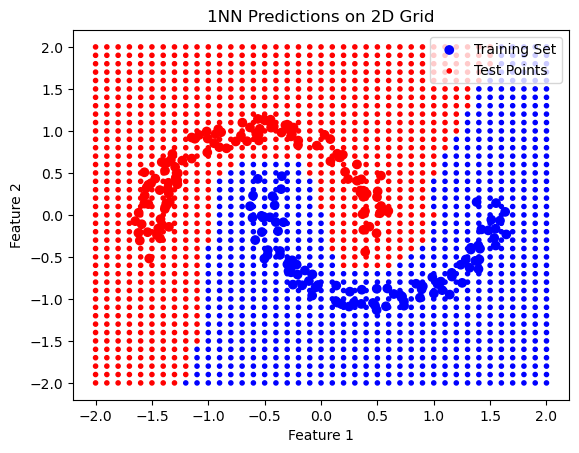

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the training set
training_set = np.loadtxt("./hw3Data/D2z.txt")

# Generate a 2D grid of test points
x_values = np.arange(-2, 2.1, 0.1)
y_values = np.arange(-2, 2.1, 0.1)
test_points = np.array([[x, y] for x in x_values for y in y_values])

# X_train, X_test, y_train, y_test =

# Function to compute Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# Function to predict the label of a test point using 1NN
def predict_1nn(test_point, training_set):
    distances = [euclidean_distance(test_point[:2], train_point[:2]) for train_point in training_set]
    nearest_neighbor_index = np.argmin(distances)
    return training_set[nearest_neighbor_index, 2]

# Make predictions for all test points
predictions = np.array([predict_1nn(test_point, training_set) for test_point in test_points])

# Visualize the training set and test points
plt.scatter(training_set[:, 0], training_set[:, 1], c=training_set[:, 2], marker='o', cmap='bwr', label='Training Set')
plt.scatter(test_points[:, 0], test_points[:, 1], c=predictions, marker='.', cmap='bwr', label='Test Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('1NN Predictions on 2D Grid')
plt.legend()
plt.show()


## Question 2.2

- Change k values for k = [1,3,5,7,10] for Question 2.2 and 2.5

In [8]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# Load the dataset
df = pd.read_csv('./hw3Data/emails.csv')

# Extract features and labels
X = df.iloc[:, 1:]  # Features
y = df['Prediction']  # Labels
# print(X)
# Function to implement kNN
def k_nearest_neighbors(train_X, train_y, test_X, k=1):
    predictions = []
    for test_point in tqdm(test_X.values):
        # Compute Euclidean distances
        distances = np.linalg.norm(train_X.values - test_point, axis=1)
        # Find indices of k nearest neighbors
        nearest_neighbor_indices = np.argpartition(distances, k)[:k]
        # Get labels of k nearest neighbors
        nearest_neighbor_labels = train_y.iloc[nearest_neighbor_indices]
        # Predict label based on majority vote
        predicted_label = np.bincount(nearest_neighbor_labels).argmax()
        predictions.append(predicted_label)
        # print(predicted_label)
    return np.asarray(predictions)

# Function for 5-fold cross-validation
def cross_validation_knn(X, y, k=1, folds=5):
    fold_size = len(X) // folds
    accuracies, precisions, recalls = [], [], []

    for fold in range(folds):
        start_idx = fold * fold_size
        end_idx = (fold + 1) * fold_size

        # Test set
        X_test = X.iloc[start_idx:end_idx]
        y_test = y.iloc[start_idx:end_idx]

        # Training set
        X_train = pd.concat([X.iloc[0:start_idx], X.iloc[end_idx:]])
        y_train = pd.concat([y.iloc[0:start_idx], y.iloc[end_idx:]])

        # Predict using kNN
        predictions = k_nearest_neighbors(X_train, y_train, X_test, k)

        # Evaluate performance
        accuracy = np.mean((predictions == y_test))
        precision = np.sum((predictions == 1) & (y_test == 1)) / (np.sum(predictions == 1))
        recall = np.sum((predictions == 1) & (y_test == 1)) / (np.sum(y_test == 1))

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)

        # print(predictions)

    return accuracies, precisions, recalls

# Run 5-fold cross-validation for kNN (k=1)
k = 5

for k in [1,3,5,7,10]:
    accuracies_knn, precisions_knn, recalls_knn = cross_validation_knn(X, y, k, folds=5)

    # Print results for kNN
    for i, (acc, prec, rec) in tqdm(enumerate(zip(accuracies_knn, precisions_knn, recalls_knn), 1)):
        print(f"Fold {i}: Accuracy = {acc:.4f}, Precision = {prec:.4f}, Recall = {rec:.4f}")

    print("k = ", k, "Accuracy = ",np.mean(accuracies_knn))


100%|██████████| 1000/1000 [02:14<00:00,  7.43it/s]
5it [00:00, ?it/s]


Fold 1: Accuracy = 0.8300, Precision = 0.6611, Recall = 0.8281
Fold 2: Accuracy = 0.8560, Precision = 0.6916, Recall = 0.8664
Fold 3: Accuracy = 0.8670, Precision = 0.7281, Recall = 0.8486
Fold 4: Accuracy = 0.8550, Precision = 0.7224, Recall = 0.8231
Fold 5: Accuracy = 0.7810, Precision = 0.6130, Recall = 0.7712
k =  1 Accuracy =  0.8378


100%|██████████| 1000/1000 [01:26<00:00, 11.55it/s]
5it [00:00, ?it/s]


Fold 1: Accuracy = 0.8490, Precision = 0.6831, Recall = 0.8772
Fold 2: Accuracy = 0.8540, Precision = 0.7028, Recall = 0.8195
Fold 3: Accuracy = 0.8600, Precision = 0.7250, Recall = 0.8169
Fold 4: Accuracy = 0.8800, Precision = 0.7788, Recall = 0.8265
Fold 5: Accuracy = 0.7800, Precision = 0.6168, Recall = 0.7418
k =  3 Accuracy =  0.8446


 78%|███████▊  | 783/1000 [01:12<00:20, 10.73it/s]


KeyboardInterrupt: 

## Question 2.3

In [3]:
import numpy as np
from tqdm import tqdm
import pandas as pd

def sigmoid(z):
    z = np.clip(z, -250, 250)
    return 1 / (1 + np.exp(-z))

def logistic_regression(X_train, y_train, learning_rate, epochs):
    m, n = X_train.shape
    weights = np.zeros(n)
    # bias = 0

    for epoch in tqdm(range(epochs)):
        z = np.dot(X_train, weights)
        prediction = sigmoid(z)

        gradient_weights = np.dot(X_train.T, (prediction - y_train))    
        # gradient_weights *= -1
        # gradient_bias = np.sum(prediction - y_train) / m

        weights -= learning_rate * gradient_weights

    return weights

def predict(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z) >= 0.5

def k_fold_cross_validation(X, y, k=5):
    m = len(y)
    fold_size = m // k
    indices = np.arange(m)
    np.random.shuffle(indices)

    accuracies = []
    precisions = []
    recalls = []

    for i in range(k):
        test_indices = indices[i*fold_size:(i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        weights  = logistic_regression(X_train, y_train, learning_rate=0.01, epochs=1000)
        y_pred = predict(X_test, weights)

        accuracy = np.mean(y_pred == y_test)
        precision = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_test == 1)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)

    return accuracies, precisions, recalls

# Load the data
data = pd.read_csv('./hw3Data/emails.csv')
X = data.iloc[:, 1:-1].values
y = data['Prediction'].values

# Normalize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add intercept term (bias) to X
X = np.hstack((np.ones((X.shape[0], 1)), X))

# 5-fold cross-validation
accuracies, precisions, recalls = k_fold_cross_validation(X, y, k=5)
print(f"Accuracies: {accuracies}")
print(f"Precisions: {precisions}")
print(f"Recalls: {recalls}")
print(f"Average Accuracy: {np.mean(accuracies)}")
print(f"Average Precision: {np.mean(precisions)}")
print(f"Average Recall: {np.mean(recalls)}")


100%|██████████| 1000/1000 [00:07<00:00, 141.74it/s]

Accuracies: [0.976, 0.964, 0.97, 0.972, 0.974]
Precisions: [0.9390681003584229, 0.9125, 0.9363057324840764, 0.9461279461279462, 0.9319727891156463]
Recalls: [0.9739776951672863, 0.9733333333333334, 0.9671052631578947, 0.9590443686006825, 0.9785714285714285]
Average Accuracy: 0.9712
Average Precision: 0.9331949136172184
Average Recall: 0.970406417766125


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

# Read the dataset
data = pd.read_csv('./hw3Data/emails.csv')
# data = data[:]

# Ensure data is shuffled
# data = data.sample(frac=1).reset_index(drop=True)

# Sigmoid function
def sigmoid(z):
    z = np.clip(z, -250, 250)
    return 1 / (1 + np.exp(-z))

# Logistic regression function
def logistic_regression(X, y, lr=0.01, epochs=1000):
    w = np.zeros(X.shape[1])
    m = len(y)
    
    for epoch in tqdm(range(epochs)):
        z = np.dot(X, w)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y))/m
        w -= lr * gradient
        
    return w

# Predict function
def predict_probs(X, weights):
    return sigmoid(np.dot(X, weights))

# Splitting data into 80% train and 20% test

# X_train = data.iloc[:int(data.shape[0]*0.8), 1:-1]
# y_train = data.iloc[:int(data.shape[0]* 0.8), -1]
# X_test = data.iloc[int(data.shape[0]*0.8):, 1:-1]
# y_test = data.iloc[int(data.shape[0]* 0.8):, -1]

X_train = data.iloc[int(data.shape[0] * 0.2):, 1:-1]
y_train = data.iloc[int(data.shape[0] * 0.2):, -1]
X_test = data.iloc[:int(data.shape[0] * 0.2), 1:-1]
y_test = data.iloc[:int(data.shape[0] * 0.2), -1]

# Add bias column
X_train = np.column_stack([np.ones(X_train.shape[0]), X_train])
X_test = np.column_stack([np.ones(X_test.shape[0]), X_test])

weights = logistic_regression(X_train, y_train, epochs=1000)

# ROC Curve calculation
tprs = []
fprs = []
thresholds = np.linspace(0, 1, 100)
y_pred_probs = predict_probs(X_test, weights)

for thresh in thresholds:
    y_pred = y_pred_probs > thresh
    tp = np.sum((y_test == 1) & (y_pred == 1))
    fp = np.sum((y_test == 0) & (y_pred == 1))
    fn = np.sum((y_test == 1) & (y_pred == 0))
    tn = np.sum((y_test == 0) & (y_pred == 0))
    
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    tprs.append(tpr)
    fprs.append(fpr)

# Plot the ROC curve
# plt.plot(fprs, tprs, label='Logistic Regression')
# plt.title('ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.show()


100%|██████████| 1000/1000 [00:06<00:00, 162.19it/s]


100%|██████████| 1000/1000 [01:29<00:00, 11.16it/s]


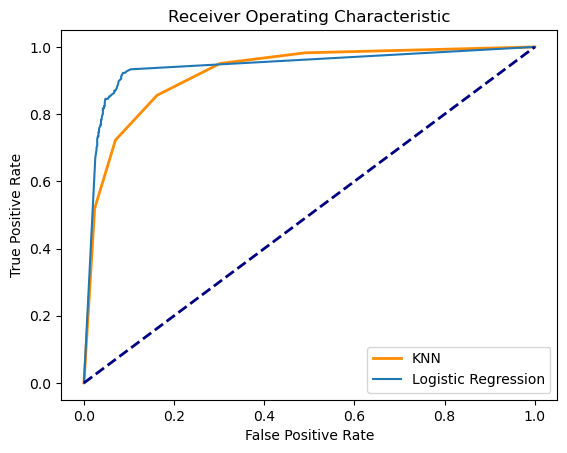

Accuracy = 0.8430, Precision = 0.6778, Recall = 0.8561


In [5]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import roc_curve

df = pd.read_csv('./hw3Data/emails.csv')

# Extract features and labels
X = df.iloc[:, 1:]  # Assuming features are in columns 1 through 3000
y = df['Prediction']

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function to implement kNN
def kNN(train_X, train_y, test_X, k):
    predictions = []
    for i in tqdm(range(len(test_X))):
        distances = [euclidean_distance(test_X.iloc[i], train_X.iloc[j]) for j in range(len(train_X))]
        # Get indices of k-nearest neighbors
        k_nearest_indices = np.argsort(distances)[:k]
        # Get the labels of k-nearest neighbors
        k_nearest_labels = train_y.iloc[k_nearest_indices]
        # Make a prediction based on majority vote
        prediction = np.bincount(k_nearest_labels).argmax()
        predictions.append(prediction)
    return np.array(predictions)

# Function to evaluate model performance
def evaluate(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    # Assuming 1 is the positive class (spam) and 0 is the negative class (not spam)
    precision = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_pred == 1)
    recall = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_true == 1)
    return accuracy, precision, recall

# Function for k-fold cross-validation
def k_fold_cross_validation(X, y, k):
    fold_size = len(X) // k
    metrics = []

    for i in range(k):
        test_start = i * fold_size
        test_end = (i + 1) * fold_size
        test_X = X.iloc[test_start:test_end, :]
        test_y = y.iloc[test_start:test_end]
        train_X = X.drop(X.index[test_start:test_end])
        train_y = y.drop(y.index[test_start:test_end])

        # Normalize the data if needed
        # train_X = (train_X - train_X.mean()) / train_X.std()
        # test_X = (test_X - train_X.mean()) / train_X.std()

        # Make predictions using kNN
        k_neighbors = 1 # You can adjust this parameter
        predictions = kNN(train_X, train_y, test_X, k_neighbors)

        # Evaluate model performance
        accuracy, precision, recall = evaluate(test_y, predictions)
        metrics.append((accuracy, precision, recall))

    return metrics

# Run 5-fold cross-validation
# results = k_fold_cross_validation(X, y, 5)

# Report results for each fold
# for i, (accuracy, precision, recall) in enumerate(results, 1):
#     print(f"Fold {i}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")

def k_nearest_neighbors(train_X, train_y, test_X, k=1):
    predictions = []
    probs = []
    for test_point in tqdm(test_X.values):
        # Compute Euclidean distances
        distances = np.linalg.norm(train_X.values - test_point, axis=1)
        # Find indices of k nearest neighbors
        nearest_neighbor_indices = np.argpartition(distances, k)[:k]
        # Get labels of k nearest neighbors
        nearest_neighbor_labels = train_y.iloc[nearest_neighbor_indices]
        # Predict label based on majority vote
        predicted_label = np.bincount(nearest_neighbor_labels).argmax()
        # Probability of being class 1 (used for ROC curve)
        prob = np.mean(nearest_neighbor_labels)
        predictions.append(predicted_label)
        probs.append(prob)
    return np.asarray(predictions), np.asarray(probs)

# Function for a single train/test split
def single_split_validation_knn(X, y, k=1, test_size=0.2):
    test_size = int(len(X) * test_size)

    # Test set
    X_test = X.iloc[:test_size]
    y_test = y.iloc[:test_size]

    # Training set
    X_train = X.iloc[test_size:]
    y_train = y.iloc[test_size:]

    # Predict using kNN
    predictions, probs = k_nearest_neighbors(X_train, y_train, X_test, k)

    # Evaluate performance
    accuracy = np.mean((predictions == y_test))
    precision = np.sum((predictions == 1) & (y_test == 1)) / (np.sum(predictions == 1) + 1e-10)  # Added epsilon to avoid division by zero
    recall = np.sum((predictions == 1) & (y_test == 1)) / (np.sum(y_test == 1) + 1e-10)  # Added epsilon to avoid division by zero

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    # roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='KNN')
    plt.plot(fprs, tprs, label='Logistic Regression')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return accuracy, precision, recall, fpr, tpr

# Run a single train/test split for kNN (k=5)
k = 5
accuracy_knn, precision_knn, recall_knn, fpr, tpr = single_split_validation_knn(X, y, k, test_size=0.2)

# Print results for kNN
print(f"Accuracy = {accuracy_knn:.4f}, Precision = {precision_knn:.4f}, Recall = {recall_knn:.4f}")


### Question 2.4

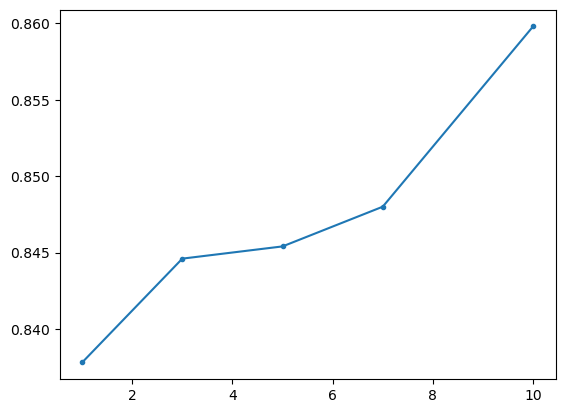

In [7]:
import numpy as np

k1 = np.mean([0.83, 0.8560, 0.8670, 0.855, 0.781])  #0.8378
k3 = np.mean([0.849,0.854,0.86,0.88,0.78])          #0.8446
k5 = np.mean([0.843,0.854,0.8770,0.8720,0.781])     #0.8454
k7 = np.mean([0.839,0.866,0.879,0.876,0.78])        #0.848
k10 = np.mean([0.867,0.8740,0.882,0.89,0.786])      #0.8598

x = [1,3,5,7,10]
y = [k1, k3, k5, k7, k10]
plt.plot(x,y, marker = '.')

### Question 2.5
- _Program is run in the previous sections. Just plotting based on thosse results_

[0.         0.02377622 0.06993007 0.16223776 0.3020979  0.49090909
 1.        ] [0.         0.51929825 0.72280702 0.85614035 0.95087719 0.98245614
 1.        ]


Text(0.5, 1.0, 'ROC curve')

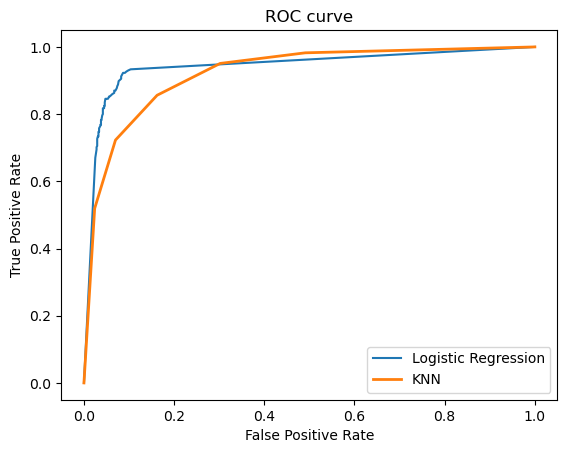

In [6]:
print(fpr, tpr)
plt.plot(fprs, tprs, label='Logistic Regression')
plt.plot(fpr, tpr, lw=2, label='KNN')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

### Queation 2.4

100%|██████████| 1000/1000 [03:49<00:00,  4.36it/s]


k =  1 Accuracies =  [0.8344000000000001]


100%|██████████| 1000/1000 [03:48<00:00,  4.37it/s]


k =  3 Accuracies =  [0.8344000000000001, 0.841]


100%|██████████| 1000/1000 [03:49<00:00,  4.36it/s]


k =  5 Accuracies =  [0.8344000000000001, 0.841, 0.8418000000000001]


100%|██████████| 1000/1000 [03:48<00:00,  4.37it/s]


k =  7 Accuracies =  [0.8344000000000001, 0.841, 0.8418000000000001, 0.8452]


100%|██████████| 1000/1000 [03:49<00:00,  4.36it/s]

k =  10 Accuracies =  [0.8344000000000001, 0.841, 0.8418000000000001, 0.8452, 0.85]


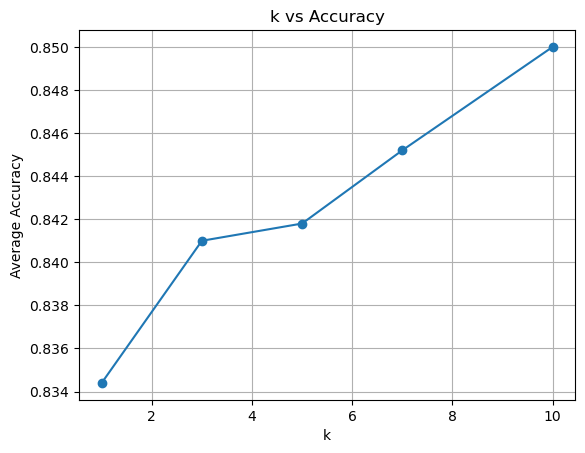

k = 1: Average Accuracy = 0.8344
k = 3: Average Accuracy = 0.8410
k = 5: Average Accuracy = 0.8418
k = 7: Average Accuracy = 0.8452
k = 10: Average Accuracy = 0.8500


In [24]:
import pandas as pd
import numpy as np
from tqdm import tqdm
# Load the data
data = pd.read_csv('./hw3Data/emails.csv')
data = data.iloc[:,1:]

# Function to compute the Euclidean distance
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2)**2))

# kNN prediction function
def predict_knn(train, test_row, k):
    distances = []
    
    # Calculate the distance to all training samples
    for train_row in train:
        distances.append(euclidean_distance(train_row[:-1], test_row))
        
    # Sort by distance and pick top k samples
    sorted_indices = np.argsort(distances)
    top_k_indices = sorted_indices[:k]
    
    # Extract the labels of the top k samples
    top_k_labels = [train[i][-1] for i in top_k_indices]
    
    # Return the most frequent label
    return max(top_k_labels, key=top_k_labels.count)

# Function for kNN with cross-validation
def kNN_cross_validation(data, k_values):
    # Folds
    folds = [
        (0, 1000),
        (1000, 2000),
        (2000, 3000),
        (3000, 4000),
        (4000, 5000)
    ]
    
    accuracies = []
    
    for k in k_values:
        fold_accuracies = []
        
        for test_start, test_end in folds:
            # Split data
            test = data[test_start:test_end].values
            train = np.vstack([data[:test_start].values, data[test_end:].values])
            
            correct = 0
            for row in tqdm(test):
                predicted = predict_knn(train, row[:-1], k)
                if predicted == row[-1]:
                    correct += 1
            fold_accuracies.append(correct / len(test))
        
        accuracies.append(np.mean(fold_accuracies))
        print("k = ", k, "Accuracies = ", accuracies)

         # Evaluate performance
    # accuracy = np.mean((predictions == y_test))
    # precision = np.sum((predictions == 1) & (y_test == 1)) / (np.sum(predictions == 1) + 1e-10)  # Added epsilon to avoid division by zero
    # recall = np.sum((predictions == 1) & (y_test == 1)) / (np.sum(y_test == 1) + 1e-10)  # Added epsilon to avoid division by zero

    # ROC curve
    # fpr, tpr, _ = roc_curve(y_test, probs)
    return accuracies

k_values = [1, 3, 5, 7, 10]
accuracies = kNN_cross_validation(data, k_values)

# Plotting
import matplotlib.pyplot as plt
plt.plot(k_values, accuracies, marker='o')
plt.title('k vs Accuracy')
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()

# Print the accuracies
for k, acc in zip(k_values, accuracies):
    print(f"k = {k}: Average Accuracy = {acc:.4f}")


### Attempt 3

In [2]:
import pandas as pd
from tqdm import tqdm
import numpy as np


# Load the dataset
df = pd.read_csv('./hw3Data/emails.csv')
df = df[df.columns[1:]]

# Check the first few rows
print(df.head())

# Check shape to ensure it's 5000x3000
print(df.shape)


def get_data_for_fold(fold_num):
    if fold_num == 1:
        return df.iloc[1000:], df.iloc[:1000]
    elif fold_num == 2:
        return pd.concat([df.iloc[:1000], df.iloc[2000:]]), df.iloc[1000:2000]
    elif fold_num == 3:
        return pd.concat([df.iloc[:2000], df.iloc[3000:]]), df.iloc[2000:3000]
    elif fold_num == 4:
        return pd.concat([df.iloc[:3000], df.iloc[4000:]]), df.iloc[3000:4000]
    else:
        return df.iloc[:4000], df.iloc[4000:5000]
    
def knn(X_train, y_train, X_test, k):
    predictions = []
    for index, test_row in tqdm(X_test.iterrows()):
        # Calculate Euclidean distances
        distances = X_train.apply(lambda row: np.linalg.norm(row - test_row), axis=1)
        # Get the indices of the k nearest neighbors
        nearest = distances.nsmallest(k).index
        # Vote for the most common class among the neighbors
        votes = y_train.loc[nearest].value_counts()
        predictions.append(votes.idxmax())
    return predictions

# Evaluation Metrics
def accuracy(y_true, y_pred):
    return sum(y_true == y_pred) / len(y_true)

def precision(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    fp = sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp +1e-10)

def recall(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-10)

# 5-fold Cross Validation with kNN
ks = [1, 3, 5, 7, 10]
average_accuracies = []

for k in ks:
    accuracies = []
    precisions = []
    recalls = []
    
    for fold in range(1, 6):
        train, test = get_data_for_fold(fold)
        
        X_train = train.drop('Prediction', axis=1)
        y_train = train['Prediction']
        X_test = test.drop('Prediction', axis=1)
        y_test = test['Prediction']
        
        y_pred = knn(X_train, y_train, X_test, k)
        
        accuracies.append(accuracy(y_test, y_pred))
        precisions.append(precision(y_test, y_pred))
        recalls.append(recall(y_test, y_pred))
    
    average_accuracies.append(np.mean(accuracies))
    
    print(f"For k = {k}:")
    print(f"Average Accuracy: {np.mean(accuracies)}")
    print(f"Average Precision: {np.mean(precisions)}")
    print(f"Average Recall: {np.mean(recalls)}\n")

# Plotting average accuracy vs k
plt.plot(ks, average_accuracies)
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs k')
plt.grid(True)
plt.show()






   the  to  ect  and  for  of    a  you  hou  in  ...  connevey  jay  valued  \
0    0   0    1    0    0   0    2    0    0   0  ...         0    0       0   
1    8  13   24    6    6   2  102    1   27  18  ...         0    0       0   
2    0   0    1    0    0   0    8    0    0   4  ...         0    0       0   
3    0   5   22    0    5   1   51    2   10   1  ...         0    0       0   
4    7   6   17    1    5   2   57    0    9   3  ...         0    0       0   

   lay  infrastructure  military  allowing  ff  dry  Prediction  
0    0               0         0         0   0    0           0  
1    0               0         0         0   1    0           0  
2    0               0         0         0   0    0           0  
3    0               0         0         0   0    0           0  
4    0               0         0         0   1    0           0  

[5 rows x 3001 columns]
(5000, 3001)


931it [16:25,  1.00s/it]

### Attempt 4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the k-nearest neighbors function
def knn(train_data, test_data, k):
    predictions = []

    for test_row in test_data:
        distances = []
        
        # Calculate Euclidean distance between test_row and all training rows
        for train_row in train_data:
            distance = np.sqrt(np.sum((test_row[:-1] - train_row[:-1])**2))
            distances.append((train_row, distance))
        
        # Sort distances and select the top k neighbors
        distances.sort(key=lambda x: x[1])
        neighbors = [x[0] for x in distances[:k]]
        
        # Count the class labels of the neighbors
        counts = {}
        for neighbor in neighbors:
            label = neighbor[-1]
            if label in counts:
                counts[label] += 1
            else:
                counts[label] = 1
        
        # Predict the class label with the most votes
        predicted_label = max(counts, key=counts.get)
        predictions.append(predicted_label)
    
    # Calculate accuracy
    correct = sum(1 for i in range(len(test_data)) if test_data[i][-1] == predictions[i])
    accuracy = correct / float(len(test_data))
    
    return accuracy

# Load the dataset
data = pd.read_csv('emails.csv')

# Define the number of folds and k values
num_folds = 5
k_values = [1, 3, 5, 7, 10]

# Initialize lists to store accuracy for each k value
average_accuracies = []

# Perform 5-fold cross-validation
for k in k_values:
    fold_accuracies = []
    for fold in range(num_folds):
        # Define the test and training sets for this fold
        test_start = fold * 1000
        test_end = (fold + 1) * 1000
        test_set = data.iloc[test_start:test_end]
        train_set = data.drop(test_set.index)

        # Calculate accuracy for this fold
        accuracy = knn(train_set.values, test_set.values, k)

        fold_accuracies.append(accuracy)

    # Calculate the average accuracy for this k value
    average_accuracy = np.mean(fold_accuracies)
    average_accuracies.append(average_accuracy)

# Plot average accuracy versus k
plt.plot(k_values, average_accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. k for kNN')
plt.grid(True)
plt.show()

# Print average accuracy for each k value
for k, accuracy in zip(k_values, average_accuracies):
    print(f'k={k}: Average Accuracy = {accuracy:.2f}')
